In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('claims.csv')

In [15]:
df.shape

(98, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [17]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [53]:
df['Linked Cases'].value_counts()

False    89
True      9
Name: Linked Cases, dtype: int64

In [55]:
df['Time to Close'].min()

-57

In [18]:
Cause_meat = df[df['Cause'] == 'meat']

In [19]:
Cause_vegetables = df[df['Cause'] == 'vegetables']

In [20]:
df1 = df.copy()

# Covert Claim amount R$50,000 to 50000

In [21]:
df1['Claim Amount'] = df['Claim Amount'].apply(lambda x: x.replace('R$','')).apply(lambda x: x.replace(',','')).astype(float)

In [22]:
df1['Claim Amount'] = df1['Claim Amount'].astype(int)

In [23]:
df1.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


# ['Cause'] Replace Nan to 'unknow

In [24]:
df1['Cause'] = df['Cause'].fillna('unknown')

In [56]:
df1['Individuals on Claim'].value_counts()

1     28
2     16
3     11
4      9
0      7
6      5
7      4
8      4
10     2
17     2
5      2
30     1
18     1
41     1
15     1
33     1
9      1
32     1
20     1
Name: Individuals on Claim, dtype: int64

# change data type

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     int32  
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 98 non-null     object 
dtypes: bool(1), float64(1), int32(1), int64(2), object(3)
memory usage: 5.2+ KB


# Q1 How does the number of claims differ across locations?


In [27]:
location = df1.groupby(['Location']).size()

In [28]:
location

Location
FORTALEZA    22
NATAL        21
RECIFE       25
SAO LUIS     30
dtype: int64

In [29]:
#list(location.keys()) failed location.values()

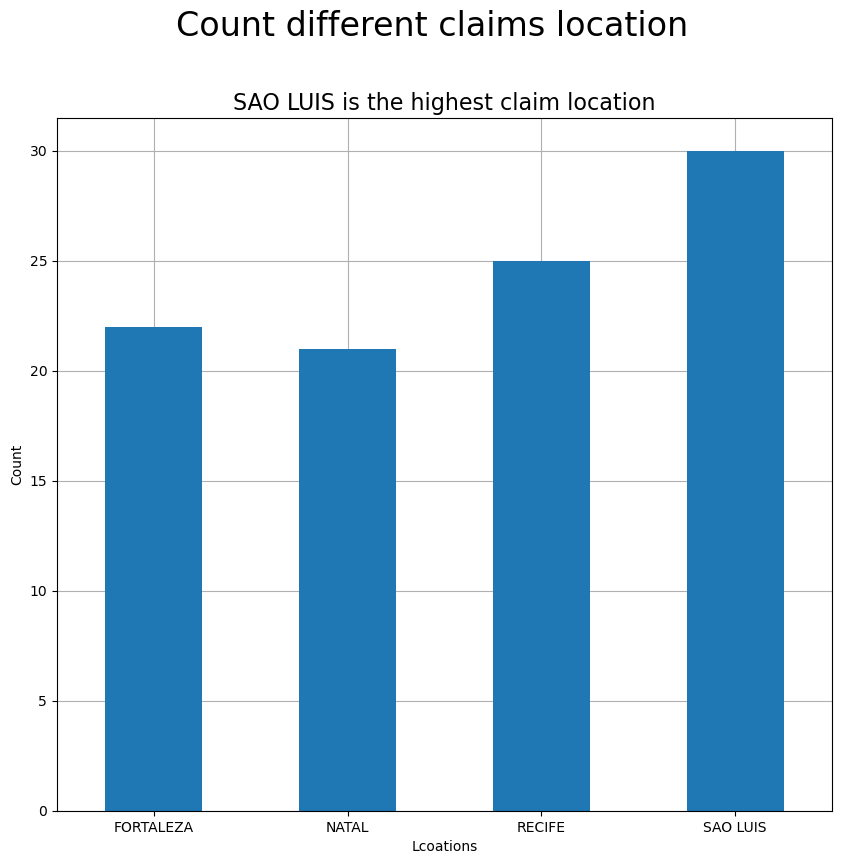

In [50]:
location.plot(kind='bar', ylabel='Count', xlabel='Lcoations',figsize=(10,9))
plt.title('SAO LUIS is the highest claim location',fontsize=16)
plt.suptitle('Count different claims location',fontsize=24, y=1)
plt.rc('axes', axisbelow=True)
plt.grid()
plt.xticks(rotation =0)
plt.savefig("Count_different_claims_location.png")

There are four claim loccation included in this data. The highest claim location is SAO LUIS, with RECIFE being second. Third is FORTALEZA and the fourth is NATAL.

#Q2 ● What is the distribution of time to close claims?


In [31]:
df1.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


In [32]:
df1['Time to Close']

0     2082
1     3591
2     2997
3     1143
4      117
      ... 
93     208
94      86
95     201
96     200
97     195
Name: Time to Close, Length: 98, dtype: int64

In [33]:
df1['Time to Close'].describe()

count      98.000000
mean      832.346939
std       686.851131
min       -57.000000
25%       340.750000
50%       638.500000
75%      1138.750000
max      3591.000000
Name: Time to Close, dtype: float64

(array([24., 29., 15., 13.,  8.,  4.,  3.,  0.,  1.,  1.]),
 array([ -57. ,  307.8,  672.6, 1037.4, 1402.2, 1767. , 2131.8, 2496.6,
        2861.4, 3226.2, 3591. ]),
 <BarContainer object of 10 artists>)

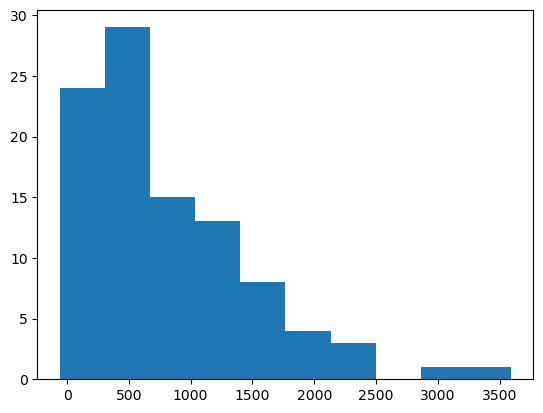

In [34]:
plt.hist(df1['Time to Close'])

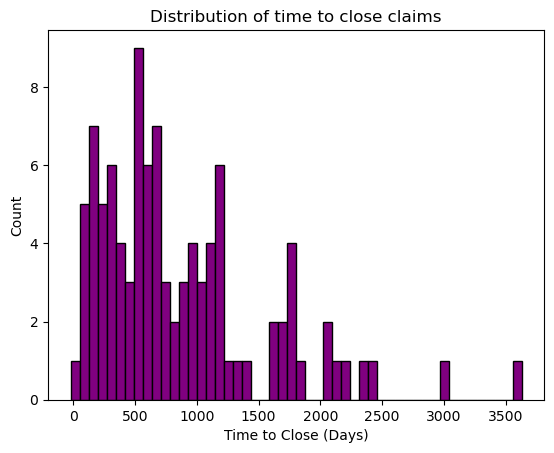

In [48]:
plt.hist(df1['Time to Close'], bins=50,align='right', color='purple', edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Time to Close (Days)")
plt.title('Distribution of time to close claims')
plt.savefig("Distribution_of_time_to_close_claims.png")

# Q3  How does the average time to close claims differ by location?


In [36]:
df1.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

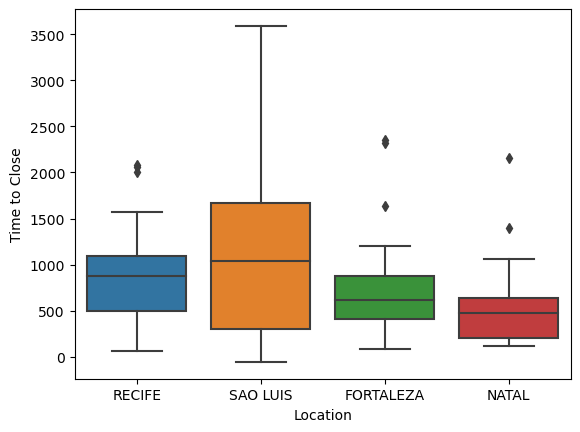

<Figure size 5000x2000 with 0 Axes>

In [38]:
sns.boxplot(x=df1["Location"], y=df1["Time to Close"])
plt.figure(figsize=(50,20))
plt.show()

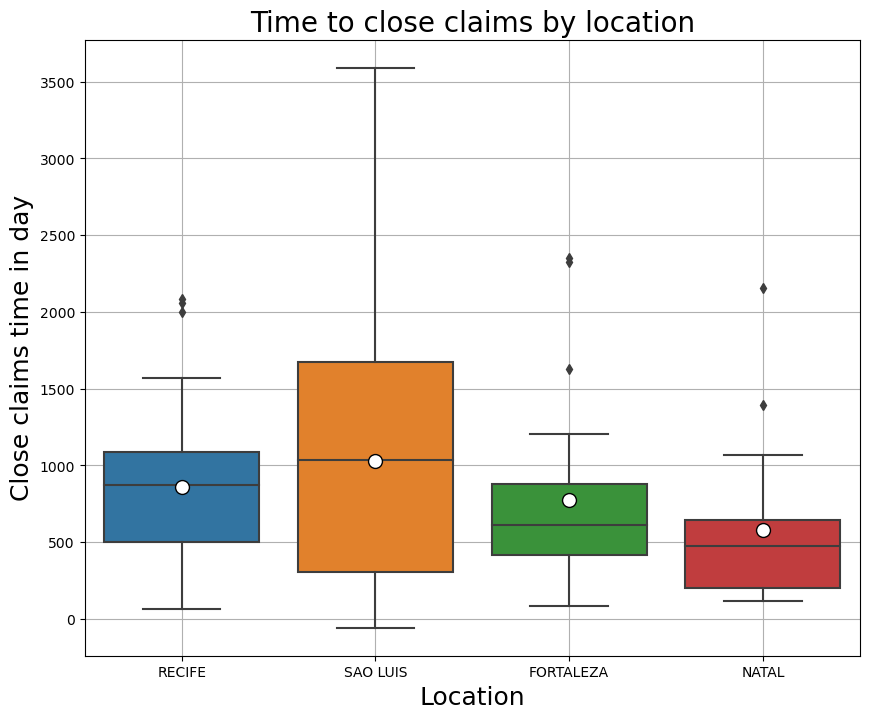

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df1,x="Location", y="Time to Close", showmeans=True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Close claims time in day", size=18)
plt.xlabel("Location", size=18)
plt.title("Time to close claims by location", size=20)
plt.grid(zorder=2)
plt.savefig("Time to close claims by location.png")


In [40]:
df1.groupby("Location").size()

Location
FORTALEZA    22
NATAL        21
RECIFE       25
SAO LUIS     30
dtype: int64

In [41]:
averagetime = df1.groupby("Location")["Time to Close"].mean()

In [42]:
averagetime

Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1026.266667
Name: Time to Close, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x18c663b8d90>,
 'caps': [<matplotlib.lines.Line2D at 0x18c663ca310>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c663b8af0>],
 'medians': [<matplotlib.lines.Line2D at 0x18c663ca880>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c663cab20>],
 'means': []}

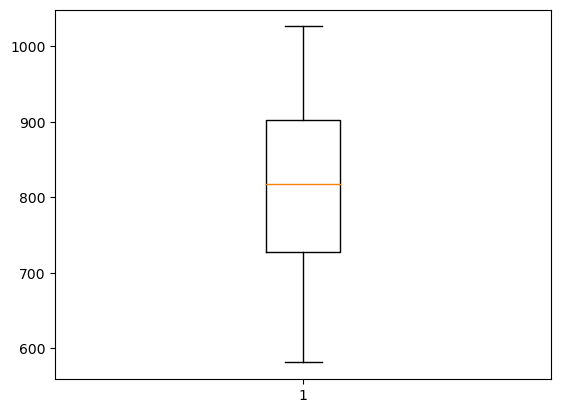

In [43]:
plt.boxplot(averagetime)

In [44]:
df1.groupby(["Location","Cause"])["Time to Close"].mean()

Location   Cause     
FORTALEZA  meat           237.333333
           unknown        860.473684
NATAL      meat           692.333333
           unknown        562.611111
RECIFE     meat          1164.000000
           unknown        825.550000
           vegetables     960.500000
SAO LUIS   meat           764.600000
           unknown       1053.047619
           vegetables    1212.750000
Name: Time to Close, dtype: float64

In [45]:
df1.groupby(["Location","Individuals on Claim"])["Time to Close"].mean()

Location   Individuals on Claim
FORTALEZA  0                        495.000000
           1                        809.714286
           2                        449.250000
           3                       1102.333333
           4                       1387.000000
           6                        634.000000
           9                        387.000000
           10                       731.000000
NATAL      0                        997.000000
           1                        874.666667
           2                        320.250000
           3                        650.000000
           4                        120.000000
           8                       1065.000000
           10                       415.000000
           15                       642.000000
           17                       149.000000
           20                       200.000000
           33                       634.000000
           41                       153.000000
RECIFE     0                